# FIT 3139 Assignment 2

## Question proposed

How do factors such as limited resources, predation and germination rate affect the seed yield of a plant species?

## Model extension

I have selected the Lotka-Volterra model to simulate this scenario. Although, the Lotka-Volterra model is usually used for 2 species predator-prey interactions, I have extended it to include a third "species". There is an argument to be made that an SIR model would be more appropriate for this scenario, but I have chosen the Lotka-Volterra model because it is more intuitive and easier to understand given the dynamics of the system.

**The scenario is as follows:**
- Species 1: Seeds
- Species 2: Plants (yield)
- Species 3: Predators (animals that eat the plants)

In the model, the seeds are attempting to grow into plants, but if there are too many seeds in the system, they will compete for the limited resources and many might not grow into plants. Furthermore, the plants are being eaten by the predators, while the seeds/plants are small there are more predators capableof eating them, but as they grow, they become less vulnerable to predation. The predators are also affected by the availability of plants, if there are not enough plants, the predators will starve and die.

**To summarise the above**

- Seeds     - competing with each other and being eaten by predators
- Plants    - being eaten by predators (assuming that after competing during seed phase, there is minimal competition between plants for resources)
- Predators - eating seeds and plants

## Model equations

$$

\begin{aligned}
& Seeds = S \\
& Plants = P \\
& Predators/Animal = A \\
\end{aligned}
\\
$$

In [549]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

## Part 3 - Continous time analysis

### Model equations

$$
\begin{aligned}

\frac{dS}{dt} &= rS - \alpha S \rho P - \beta S \\
\frac{dP}{dt} &= (1 - r) S - \delta \rho P - \alpha \rho S P \\
\frac{d \rho}{dt} &= \eta \rho SP - \mu \rho

\end{aligned}
$$

In [550]:
##########################################################################
#  EQUATIONS
##########################################################################

# dSdt = lambda r, S, alpha, rho, P, beta: \
#     (r*S) - (alpha*rho*P) - (beta * S)

# dPdt = lambda r, S, beta, delta, rho, P, alpha: \
#     (((1-r) * S * rho) + (delta * P)) - (alpha * rho * S * P) - (beta * S * P) 

# dpdt = lambda eta, rho, S, P, mu, alpha: \
#     (alpha * eta * rho * S * P) - (mu * rho)

dSdt = lambda alpha, beta, gamma, delta, S, P, rho: \
    (alpha * S) - (beta * S * rho) - (gamma * S * P) - (delta * P)

dPdt = lambda alpha, beta, delta, gamma, S, P, rho: \
    (delta * P) - (beta * P * rho) - (gamma * S * P) + ((1 - alpha) * S * P)

dpdt = lambda eta, mu, S, P, rho: \
    (eta * S * P * rho) - (mu * rho)


# def generate_lotka_volterra(r, alpha, beta, delta, eta, mu):
#     # x[0] = S
#     # x[1] = P
#     # x[2] = rho
#     ddt = lambda t, x: np.array([
#         dSdt(r, x[0], alpha, x[2], x[1], beta),
#         dPdt(r, x[0], beta, delta, x[2], x[1], alpha),
#         dpdt(eta, x[2], x[0], x[1], mu, alpha)
#     ])

#     return ddt

def generate_lotka_volterra(alpha, beta, gamma, delta, eta, mu):
    # x[0] = S
    # x[1] = P
    # x[2] = rho
    ddt = lambda t, x: np.array([
        dSdt(alpha, beta, gamma, delta, x[0], x[1], x[2]),
        dPdt(alpha, beta, delta, gamma, x[0], x[1], x[2]),
        dpdt(eta, mu, x[0], x[1], x[2])
    ])

    return ddt

In [551]:
# r = 0.01         # % of S that dies
# alpha = 0.1    # predation rate coefficient
# beta = 0.01     # death by natural causes - limited resources etc
# delta = 0.01    # self pollination rate
# eta = 5      # birth rate of predator
# mu = 0.1       # death rate of predator
# S = 1000         # initial population of seed
# P = 10          # initial population of plant
# rho = 10         # population of predator

# LV = generate_lotka_volterra(0.1, 0.01, 0.01, 0.01, 0.01, 0.01)
# print(LV(0, [S, P, rho]))

In [552]:
# alpha = 0.9    # seed growth rate
# beta = 0.1     # effect of predator on seed and plant
# gamma = 0.001    # resource competition and limited resources
# delta = 5    # plant growth rate and self pollination
# eta = 0.01      # birth rate of predator / effect of presence of prey on predator
# mu = 0.2       # death rate of predator

# S = 1000         # initial population of seed
# P = 10          # initial population of plant
# rho = 10         # initial population of predator

# LV = generate_lotka_volterra(alpha, beta, gamma, delta, eta, mu)
# print(LV(0, [S, P, rho]))


In [553]:
# x0 = np.array([S, P, rho])
# sol = solve_ivp(fun=LV, y0=x0, t_span=(0, 100), method='BDF')

In [554]:
# t = sol.t
# S = sol.y[0]
# P = sol.y[1]
# rho = sol.y[2]

ValueError: x and y must have same first dimension, but have shapes (49,) and (311,)

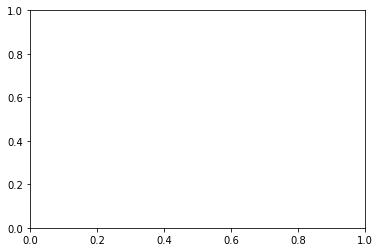

In [555]:
plt.plot(t, S, label='Seed')
plt.plot(t, P, label='Plant')
plt.plot(t, rho, label='Predator Population')
plt.legend()

In [558]:
dxdt = lambda a, b,x,y: (a * x) - (b * x * y)
dydt = lambda c, d, e, x, y, z: (-c * y) + (d * x * y) - (e * y * z)
dzdt = lambda f, g, y, z: (-f * z) + (g * y * z)

def generate_lotka_volterra(a, b, c, d, e, f, g):
    ddt = lambda t, x: np.array([
        dxdt(a, b, x[0], x[1]),
        dydt(c, d, e, x[0], x[1], x[2]),
        dzdt(f, g, x[1], x[2])
    ])

    return ddt


In [575]:
a = 0.1    # plant growth rate
b = 0.1   
c = 0.1     
d = 0.01
e = 0.01
f = 0.01
g = 0.01

x0 = np.array([10, 5, 50])
LV1 = generate_lotka_volterra(a, b, c, d, e, f, g)

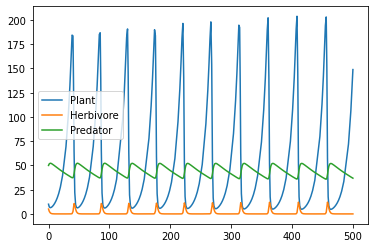

In [577]:
sol = solve_ivp(fun=LV1, y0=x0, t_span=(0, 500), method='RK45')
t = sol.t
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]

plt.plot(t, x, label='Plant')
plt.plot(t, y, label='Herbivore')
plt.plot(t, z, label='Predator')
plt.legend()

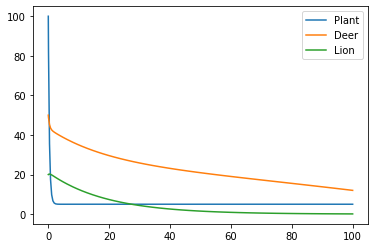